# Installations

In [1]:
!pip install -U -q PyDrive
!pip install gspread --upgrade
!pip uninstall gspread-dataframe -y
!pip install gspread-dataframe 
!pip install -q xlrd
!pip install sklearn

import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import statsmodels.api as sm
import scipy as sp
import scipy.stats as stats
import random

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default 
from numpy import mean, absolute, sqrt
from sklearn.model_selection import LeaveOneOut, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from gspread_dataframe import get_as_dataframe, set_with_dataframe

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: gspread-dataframe 3.3.0
Uninstalling gspread-dataframe-3.3.0:
  Successfully uninstalled gspread-dataframe-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gspread_dataframe-3.3.0-py2.py3-none-any.whl (7.9 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data sets

###UKCP Key Results Data

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1Loe0VT9eYRld81fuuU4Xw-iBcjROq0O9'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('Fuelpov.xlsx')

df = pd.read_excel('Fuelpov.xlsx')
df = df.drop(columns="Unnamed: 0")

### Fuel Poverty Trends 2003-2019

In [4]:
creds, _ = default()
gc = gs.authorize(creds)
sh = gc.open_by_key('1m2jL-uU4fKDFE2PJvTyXyBk1J8YP4zlK1ATfqUL-CTU')
worksheets = sh.worksheets()

for i in range(17):
  globals()['df%s' % i] = get_as_dataframe(sh.get_worksheet(i))
df0.head(30)

,Fuel poverty status,Year,Number of households (000's),Proportion of fuel poor households (%),Proportion of not fuel poor households (%),Aggregate fuel poverty gap (£m): Real Terms1,Average fuel poverty gap (£): Real Terms1,Median fuel poverty gap (£):Real Terms1
0,Fuel poor,2003,2425,11.700,88.300,580.0,239,152.0
1,Fuel poor,2004,2428,11.600,88.400,599.0,247,151.0
2,Fuel poor,2005,2392,11.320,88.680,632.0,264,155.0
3,Fuel poor,2006,2274,10.720,89.280,774.0,340,216.0
4,Fuel poor,2007,2371,11.090,88.910,783.0,330,203.0
5,Fuel poor,2008,2499,11.670,88.330,884.0,354,217.0
6,Fuel poor,2009,2562,11.900,88.100,954.0,372,241.0
7,Fuel poor,2010,2462,11.400,88.600,918.0,373,231.0
8,Fuel poor,2011,2424,11.060,88.940,985.0,406,238.0
9,Fuel poor,2012,2344,10.690,89.310,954.0,407,253.0


### Met Office Temp Data

In [5]:
file_id = '1cytxlzFMJn0Xnr19CHUg7CUaDyVpFfgQ'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('airtemp.xlsx')

tempdf = pd.read_excel('airtemp.xlsx')

### Electric consumption data


In [6]:

sh = gc.open_by_key('1dhsMxCEJP99WcZqUEp2Hrra98tJ26Q301o1Gj0n_NFQ')
worksheets = sh.worksheet('Sheet1')
elecdf = get_as_dataframe(sh.get_worksheet(0))
elecdf['elec difference'] = elecdf['Average consumption (actual) (kWh)']-elecdf['Average consumption (temperature adjusted) (kWh)']
elecdf[['Year','Average consumption (temperature adjusted) (kWh)',	'Average consumption (actual) (kWh)','elec difference']]

,Year,Average consumption (temperature adjusted) (kWh),Average consumption (actual) (kWh),elec difference
0,2003,4056,3989,-67
1,2004,4116,4040,-76
2,2005,4129,4059,-70
3,2006,4361,4279,-82
4,2007,4355,4265,-90
5,2008,4416,4391,-25
6,2009,4319,4297,-22
7,2010,4117,4218,101
8,2011,4022,3932,-90
9,2012,3999,3997,-2


### Gas consumption data

In [7]:

sh = gc.open_by_key('1rtdaTGlL1cU8D4tXwEG_q5jD7H7bJoetHGUP8XIBnuU')
worksheets = sh.worksheet('Sheet1')
gasdf = get_as_dataframe(sh.get_worksheet(0))
gasdf['gas difference'] = gasdf['Average consumption (actual) (kWh)']-gasdf['Average consumption (temp adjusted) (kWh)']
gasdf [['Year','Average consumption (temp adjusted) (kWh)',	'Average consumption (actual) (kWh)','gas difference']]

,Year,Average consumption (temp adjusted) (kWh),Average consumption (actual) (kWh),gas difference
0,2003,19809,18361,-1448
1,2004,20354,18677,-1677
2,2005,19157,17843,-1314
3,2006,18249,17003,-1246
4,2007,18099,16216,-1883
5,2008,16831,16387,-444
6,2009,16053,15666,-387
7,2010,15734,17651,1917
8,2011,15505,13946,-1559
9,2012,15556,15521,-35


# Exploratory Data Analysis

### Winter max, mean and min temps

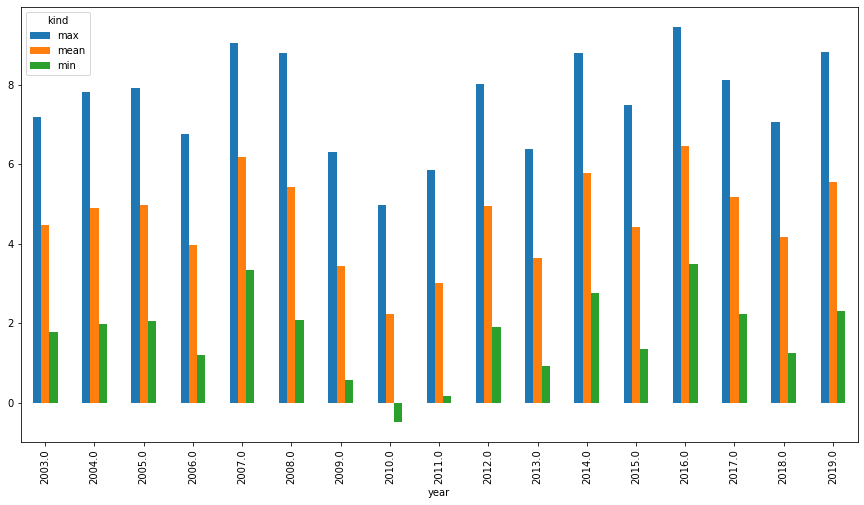

In [8]:
tempdf.pivot(index='year', columns = 'kind', values = 'win').plot(kind='bar', figsize=(15,8))

### Household EPC rating against proportion in fuel poverty

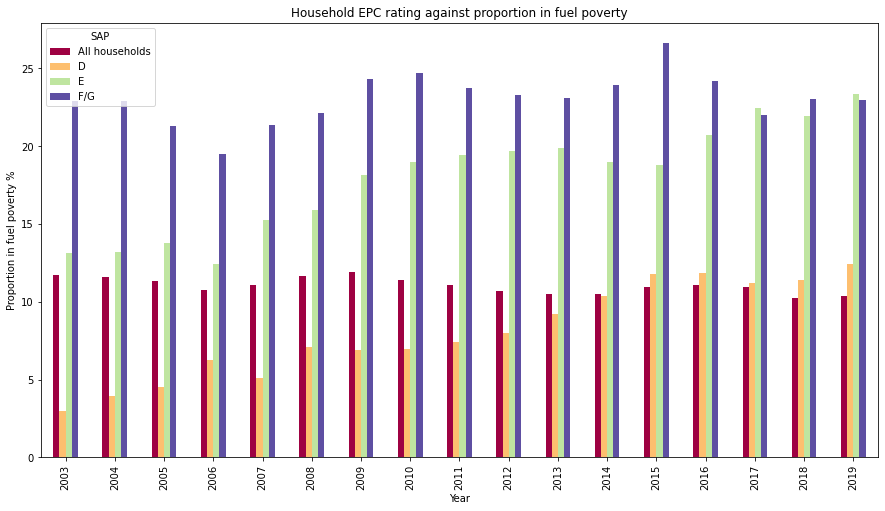

In [9]:
dfEPC=df1.pivot(index='Year', columns = 'SAP', values = 'Proportion of fuel poor households (%)')
ax = dfEPC.plot(kind='bar', figsize=(15,8), title = 'Household EPC rating against proportion in fuel poverty', colormap='Spectral')
ax.set(ylabel="Proportion in fuel poverty %")
ax

### Household heating system against proportion in fuel poverty

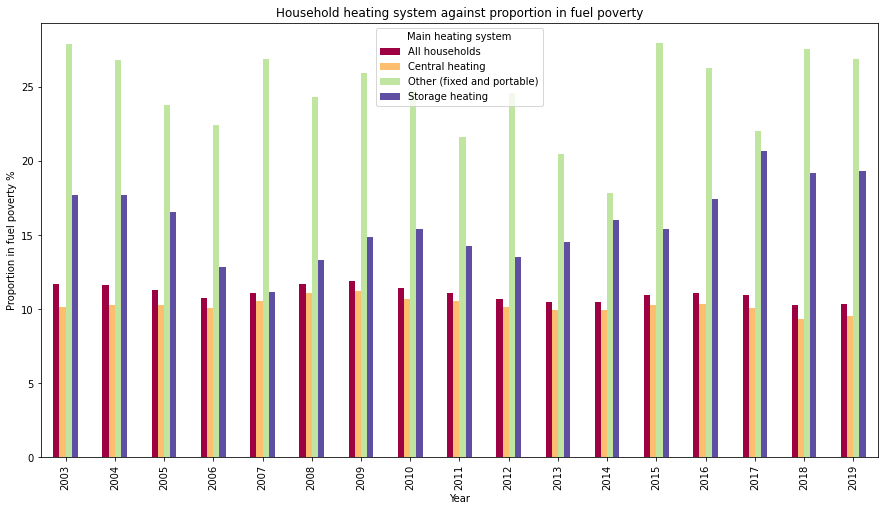

In [10]:
dfheat=df4.pivot(index='Year', columns = 'Main heating system', values = 'Proportion of fuel poor households (%)')
ax = dfheat.plot(kind='bar', figsize=(15,8), title = 'Household heating system against proportion in fuel poverty', colormap='Spectral')
ax.set(ylabel="Proportion in fuel poverty %")
ax

### Household region against proportion in fuel poverty

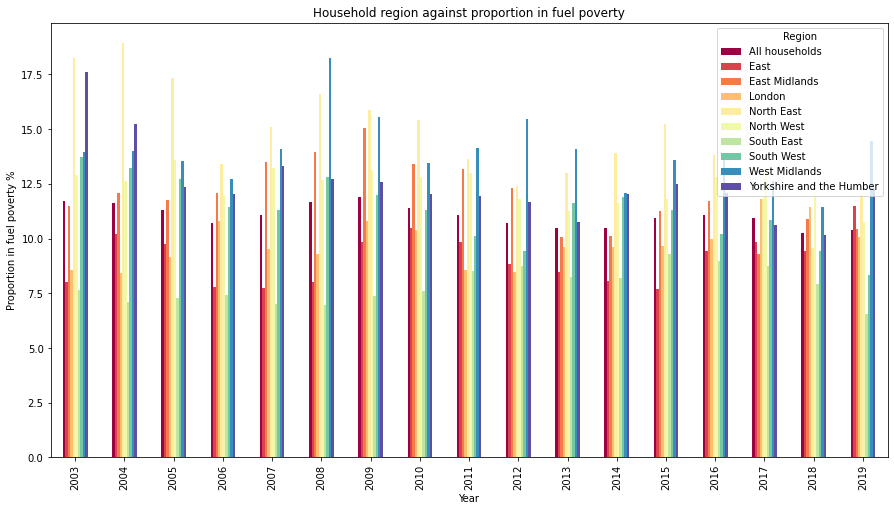

In [11]:
dfregion=df2.pivot(index='Year', columns = 'Region', values = 'Proportion of fuel poor households (%)')
ax = dfregion.plot(kind='bar', figsize=(15,8), title = 'Household region against proportion in fuel poverty', colormap='Spectral')
ax.set(ylabel="Proportion in fuel poverty %")
ax

### Household insulation against proportion in fuel poverty

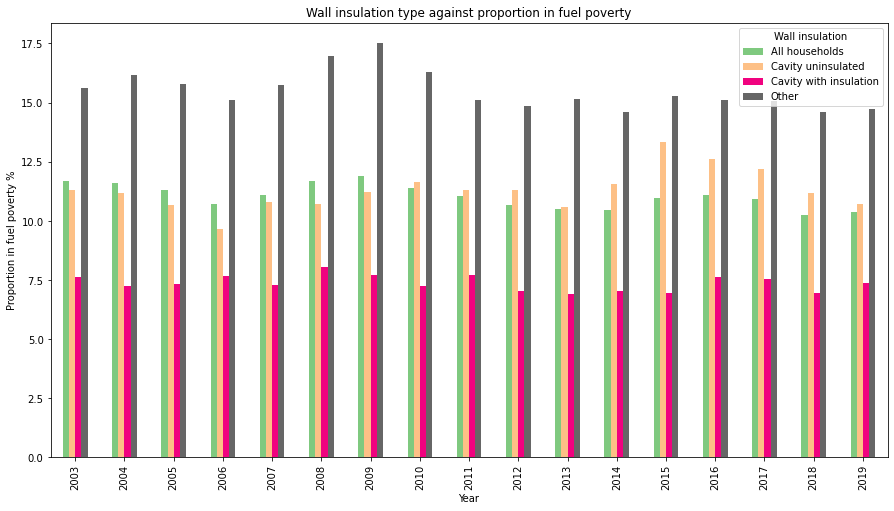

In [12]:
dfinsu=df6.pivot(index='Year', columns = 'Wall insulation', values = 'Proportion of fuel poor households (%)')
ax = dfinsu.plot(kind='bar', figsize=(15,8), title = 'Wall insulation type against proportion in fuel poverty', colormap='Accent')
ax.set(ylabel="Proportion in fuel poverty %")
ax

### Calculating winter mean based on Oct-Mar

In [13]:
dftemp = tempdf[tempdf['kind'] == 'mean']
dftemp = dftemp[['jan','feb','mar','oct','nov','dec']]
dftemp['winmean'] = dftemp.mean(axis=1)

In [14]:
meandf = tempdf[tempdf['kind'] == 'mean']
meandf=meandf[['year','win']]
meandf['win'] = dftemp['winmean']
mindf = tempdf[tempdf['kind'] =='min']
mindf=mindf[['year','win']]
maxdf = tempdf[tempdf['kind'] =='max']
maxdf=maxdf[['year','win']]

fueldf = df0[df0['Fuel poverty status'] == 'Fuel poor']
fueldf=fueldf[['Proportion of not fuel poor households (%)']]

dff=df1.pivot(index='Year', columns = 'SAP', values = 'Proportion of not fuel poor households (%)')
SAPdf = dff.reset_index()
SAPdf = SAPdf[['D','E','F/G']]

combo1df=pd.concat([meandf, fueldf], axis=1)

combo2df=pd.concat([meandf, SAPdf], axis=1)

### Temperature change compared with proportion of households not in fuel poverty


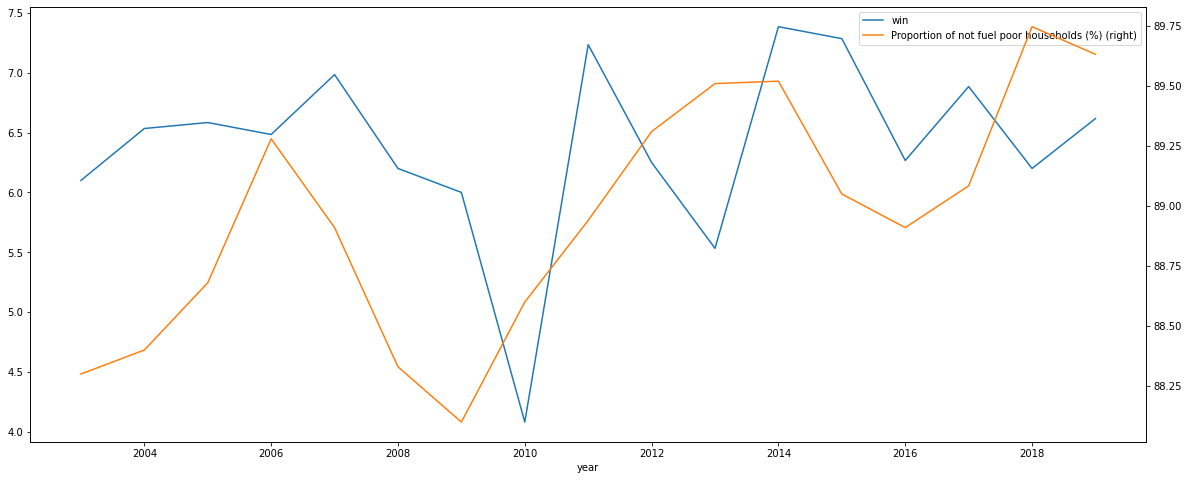

In [15]:
ax = combo1df.plot('year','win')
combo1df.plot('year','Proportion of not fuel poor households (%)',secondary_y=True, ax=ax,figsize=(20,8))

### Tempertaure change compared with the proportion of households not in fuel poverty with EPC ratings of F or G

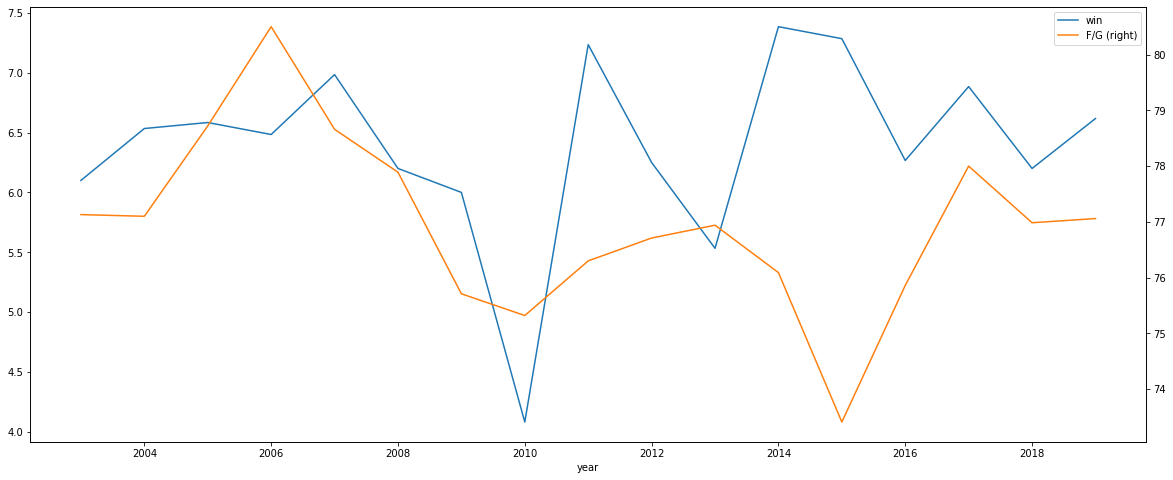

In [16]:
ax = combo2df.plot('year','win')
combo2df.plot('year','F/G',secondary_y=True, ax=ax,figsize=(20,8))

### Combining gas and elec data

In [17]:
dfcombo=pd.DataFrame()
dfcombo['Year'] = gasdf['Year']
dfcombo['Average consumption difference elec (kWh)'] = elecdf['elec difference']
dfcombo['Average consumption difference gas (kWh)'] = gasdf['gas difference']
dfcombo['Average consumption difference (kWh)'] = elecdf['elec difference'] + gasdf['gas difference']
dfcombo['Overall Bill gas: Based on average consumption (temperature adjusted): Real Terms'] = gasdf['Overall Bill: Based on average consumption (temperature adjusted): Real Terms']
dfcombo['Overall Bill elec: Based on average consumption (temperature adjusted): Real Terms'] = elecdf['Overall Bill: Based on average consumption (temperature adjusted): Real Terms']
dfcombo['Overall Bill: Based on average consumption (temperature adjusted): Real Terms'] = dfcombo['Overall Bill gas: Based on average consumption (temperature adjusted): Real Terms'] + dfcombo['Overall Bill elec: Based on average consumption (temperature adjusted): Real Terms'] 
dfcombo['Overall Bill: Based on average consumption (temperature adjusted): Real Terms'] = dfcombo['Overall Bill: Based on average consumption (temperature adjusted): Real Terms']-dfcombo["Overall Bill: Based on average consumption (temperature adjusted): Real Terms"].mean()
dfcombo

,Year,Average consumption difference elec (kWh),Average consumption difference gas (kWh),Average consumption difference (kWh),Overall Bill gas: Based on average consumption (temperature adjusted): Real Terms,Overall Bill elec: Based on average consumption (temperature adjusted): Real Terms,Overall Bill: Based on average consumption (temperature adjusted): Real Terms
0,2003,-67,-1448,-1515,393,350,-310.823529
1,2004,-76,-1677,-1753,416,355,-282.823529
2,2005,-70,-1314,-1384,439,384,-230.823529
3,2006,-82,-1246,-1328,500,460,-93.823529
4,2007,-90,-1883,-1973,551,499,-3.823529
5,2008,-25,-444,-469,587,563,96.176471
6,2009,-22,-387,-409,626,557,129.176471
7,2010,101,1917,2018,587,510,43.176471
8,2011,-90,-1559,-1649,621,529,96.176471
9,2012,-2,-35,-37,682,546,174.176471


# Linear Regression

[[ 1.         -0.24293346]
 [-0.24293346  1.        ]]


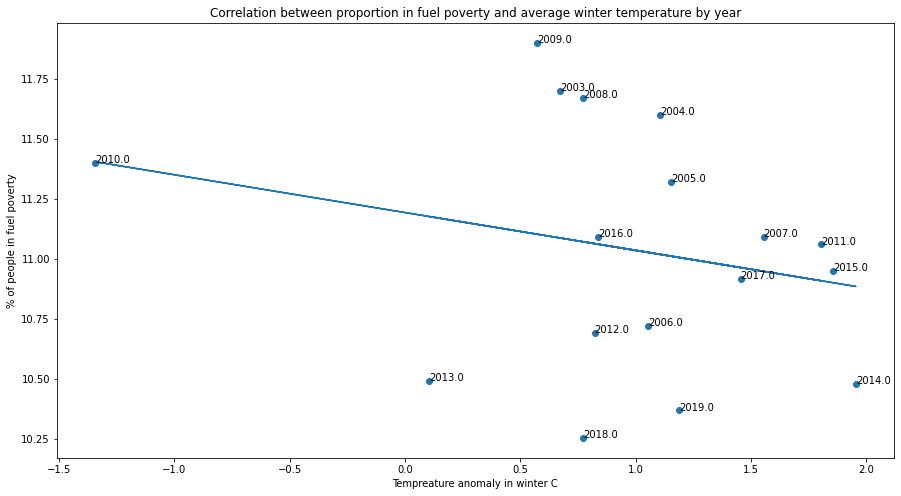

In [18]:
fueldf = df0[df0['Fuel poverty status'] == 'Fuel poor']
y = fueldf['Proportion of fuel poor households (%)'].to_numpy()
meandf['win'] = meandf['win']- 5.427778
x = meandf['win'].to_numpy()
n = meandf['year'].to_numpy()
plt.figure(figsize=(15,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Tempreature anomaly in winter C')
plt.ylabel('% of people in fuel poverty')
plt.title('Correlation between proportion in fuel poverty and average winter temperature by year')

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print(my_rho)

In [19]:

z = dfcombo['Overall Bill: Based on average consumption (temperature adjusted): Real Terms'].values.reshape(-1,1)
scaler = preprocessing.MinMaxScaler(feature_range=(-((max(y)-min(y))/2),((max(y)-min(y))/2)))
scaler.fit(z)
scale = scaler.transform(z)

### Correlation between fuel poverty and winter temperature

[[ 1.        -0.2289841]
 [-0.2289841  1.       ]]


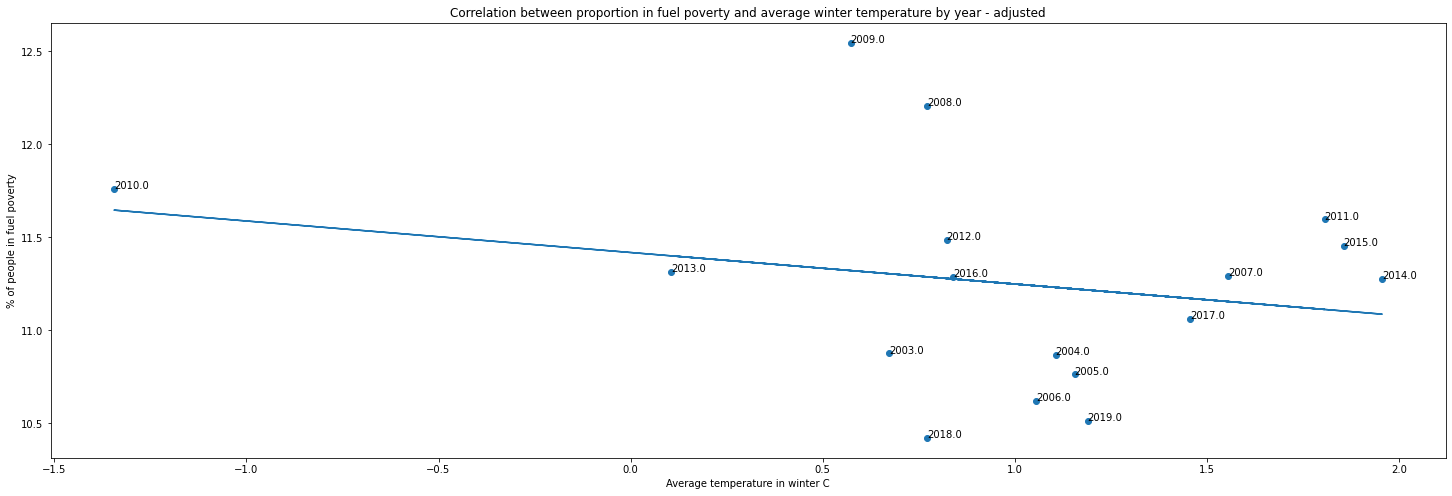

In [20]:
fueldf = df0[df0['Fuel poverty status'] == 'Fuel poor']
y = fueldf['Proportion of fuel poor households (%)'].to_numpy()
for i in range(17):
  y[i] = y[i]+scale[i]
x = meandf['win'].to_numpy()
n = meandf['year'].to_numpy()
plt.figure(figsize=(25,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Average temperature in winter C')
plt.ylabel('% of people in fuel poverty')
plt.title('Correlation between proportion in fuel poverty and average winter temperature by year - adjusted')


for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print(my_rho)

### Correlation between energy consumption (adjusted by temperature) and winter mean

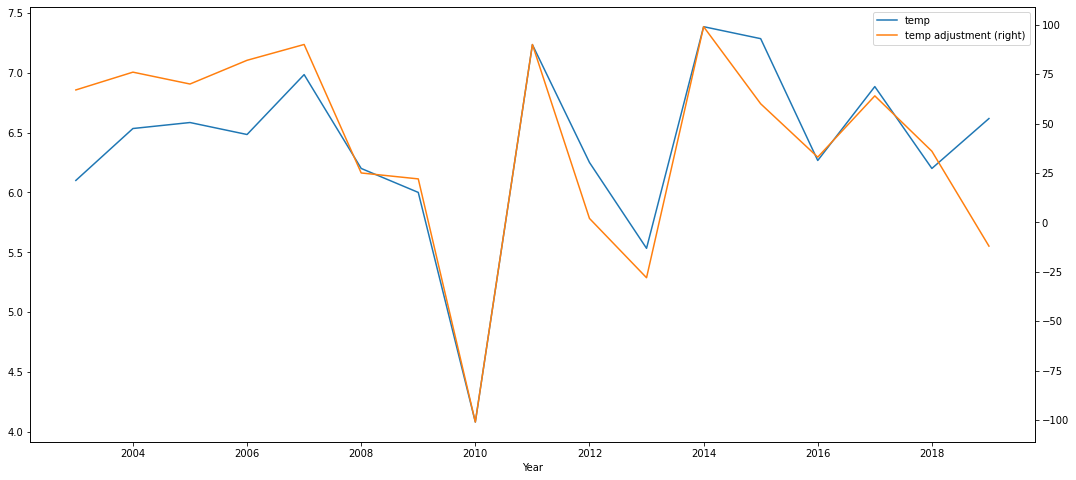

In [21]:
df = elecdf[['Year','Average consumption (temperature adjusted) (kWh)','Average consumption (actual) (kWh)']]
df['temp adjustment'] = (df['Average consumption (temperature adjusted) (kWh)']-df['Average consumption (actual) (kWh)'])
df['temp']=combo2df['win']
df = df[['Year','temp adjustment','temp']]
ax = df.plot('Year','temp')
df.plot(x='Year', y ='temp adjustment', secondary_y=True, ax=ax,figsize=(18,8))

### Electric Only

Correlation Coefficient = -0.8604975427685027 


,Year,Average consumption difference elec (kWh),Average consumption difference gas (kWh),Average consumption difference (kWh),Overall Bill gas: Based on average consumption (temperature adjusted): Real Terms,Overall Bill elec: Based on average consumption (temperature adjusted): Real Terms,Overall Bill: Based on average consumption (temperature adjusted): Real Terms
0,2003,-67,-1448,-1515,393,350,-310.823529
1,2004,-76,-1677,-1753,416,355,-282.823529
2,2005,-70,-1314,-1384,439,384,-230.823529
3,2006,-82,-1246,-1328,500,460,-93.823529
4,2007,-90,-1883,-1973,551,499,-3.823529
5,2008,-25,-444,-469,587,563,96.176471
6,2009,-22,-387,-409,626,557,129.176471
7,2010,101,1917,2018,587,510,43.176471
8,2011,-90,-1559,-1649,621,529,96.176471
9,2012,-2,-35,-37,682,546,174.176471


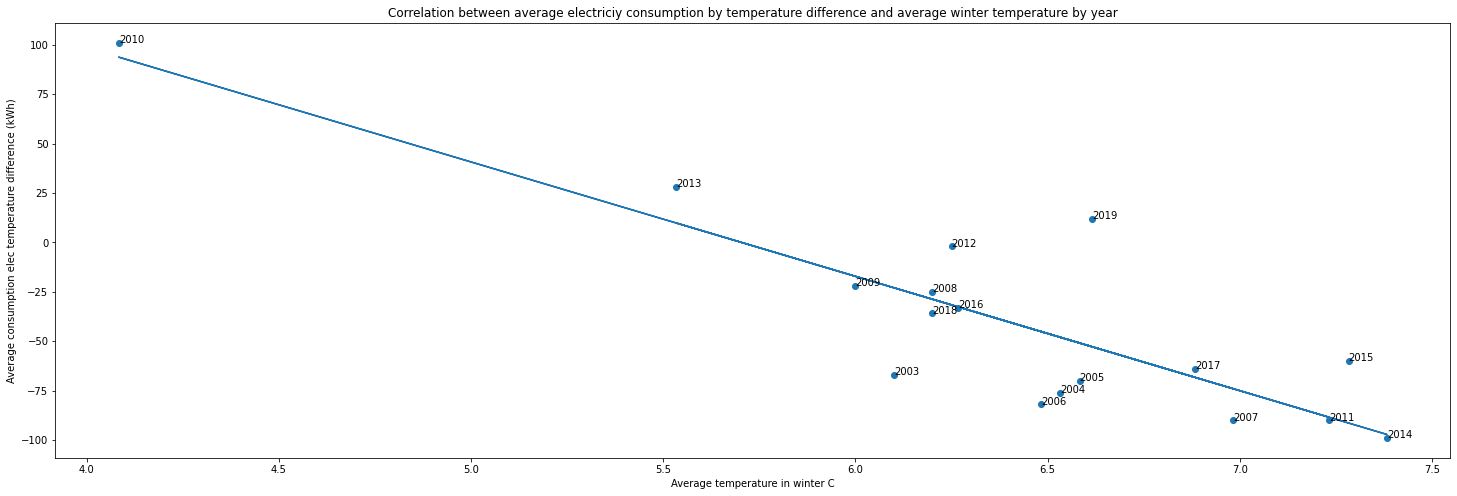

In [22]:
df = dfcombo[['Year','Average consumption difference elec (kWh)',	'Average consumption difference gas (kWh)',	'Average consumption difference (kWh)']]
df['temp']=combo2df['win']

y = df['Average consumption difference elec (kWh)'].to_numpy()
x = dftemp['winmean'].to_numpy()
n = df['Year'].to_numpy()
plt.figure(figsize=(25,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Average temperature in winter C')
plt.ylabel('Average consumption elec temperature difference (kWh)')
plt.title('Correlation between average electriciy consumption by temperature difference and average winter temperature by year')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print('Correlation Coefficient =\033[1m', my_rho[1,0], '\033[0m') 
dfcombo

### Gas Only

Correlation Coefficient = -0.8540730797948981 


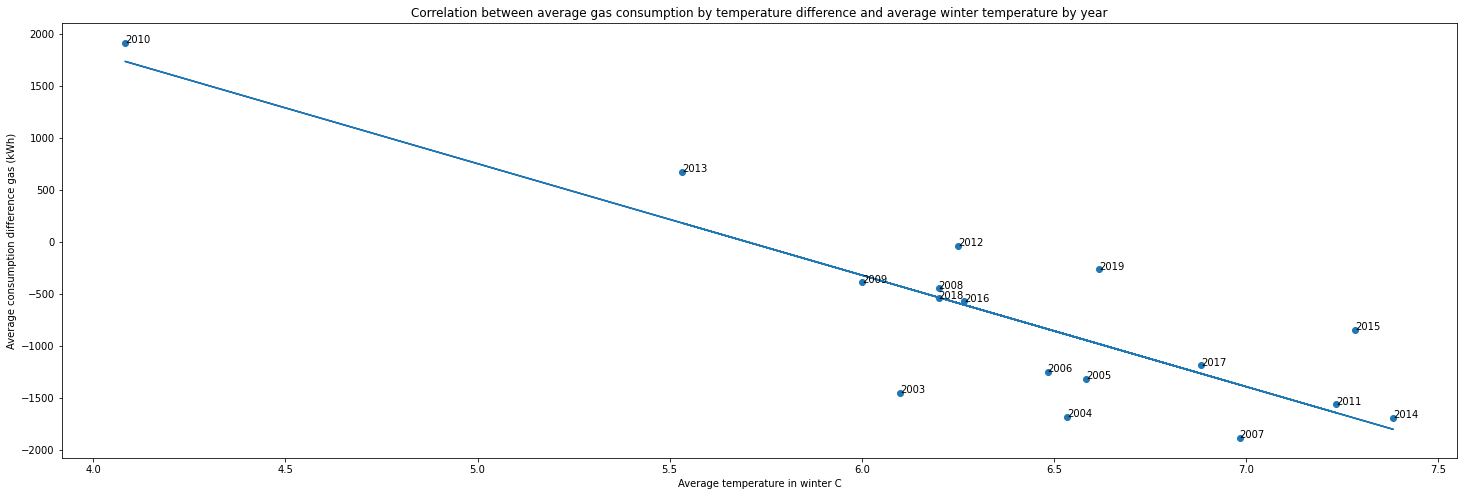

In [23]:
y = df['Average consumption difference gas (kWh)'].to_numpy()
x = dftemp['winmean'].to_numpy()
n = df['Year'].to_numpy()
plt.figure(figsize=(25,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Average temperature in winter C')
plt.ylabel('Average consumption difference gas (kWh)')
plt.title('Correlation between average gas consumption by temperature difference and average winter temperature by year')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print('Correlation Coefficient =\033[1m', my_rho[1,0], '\033[0m') 

## Anomaly scatters

In [24]:
file_id = '1tRg7_ACUBrxAfRYeuhdGfBIgei38mx7S'
downloaded = drive.CreateFile({'id': file_id})

# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('meantemp.xlsx')

meandf = pd.read_excel('meantemp.xlsx')

olddf = meandf.iloc[77:107]
olddf = olddf[[' jan',' feb',' mar',' oct',' nov',' dec']]
olddf['winmean'] = olddf.mean(axis=1)
olddf[["winmean"]].mean()

winmean    5.427778
dtype: float64

In [25]:
tempdfm = tempdf[tempdf['kind'] == 'mean']
tempdfm = tempdfm[['jan','feb','mar','oct','nov','dec']]
tempdfm['winmean'] = tempdfm.mean(axis=1)
tempdfm = tempdfm['winmean']- 5.427778
tempdfanom = pd.DataFrame(tempdfm)

### Electric Only

Correlation Coefficient = -0.8604975427685029 


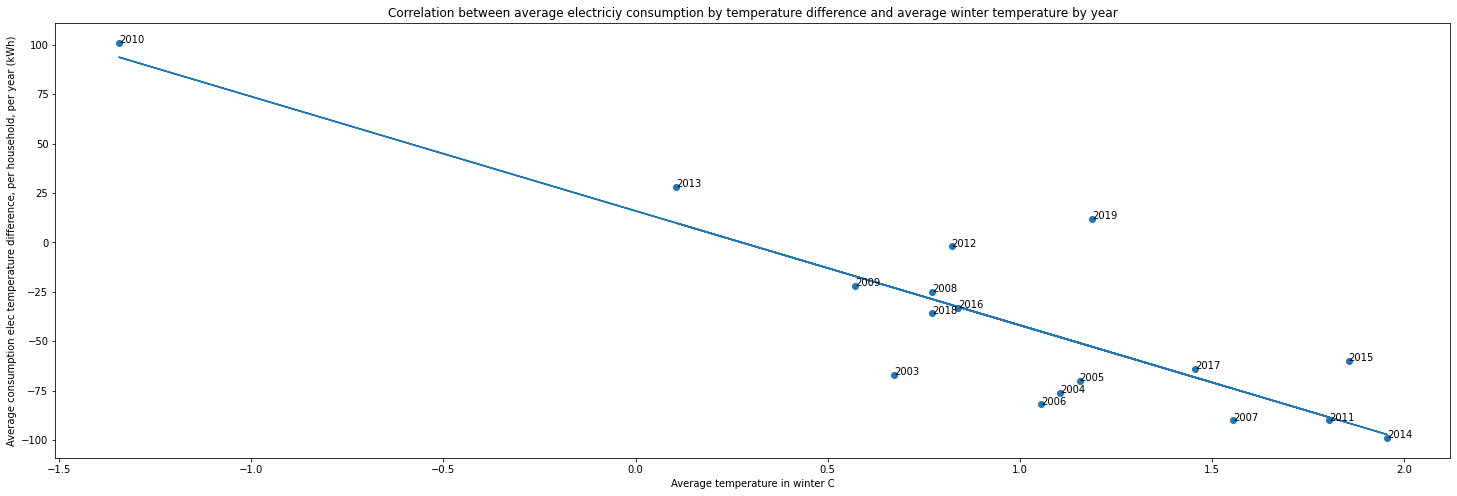

In [26]:
y = df['Average consumption difference elec (kWh)'].to_numpy()
x = tempdfanom.iloc[:, 0].to_numpy()
n = df['Year'].to_numpy()
plt.figure(figsize=(25,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Average temperature in winter C')
plt.ylabel('Average consumption elec temperature difference, per household, per year (kWh)')
plt.title('Correlation between average electriciy consumption by temperature difference and average winter temperature by year')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print('Correlation Coefficient =\033[1m', my_rho[1,0], '\033[0m') 

### Gas Only

Correlation Coefficient = -0.8540730797948983 


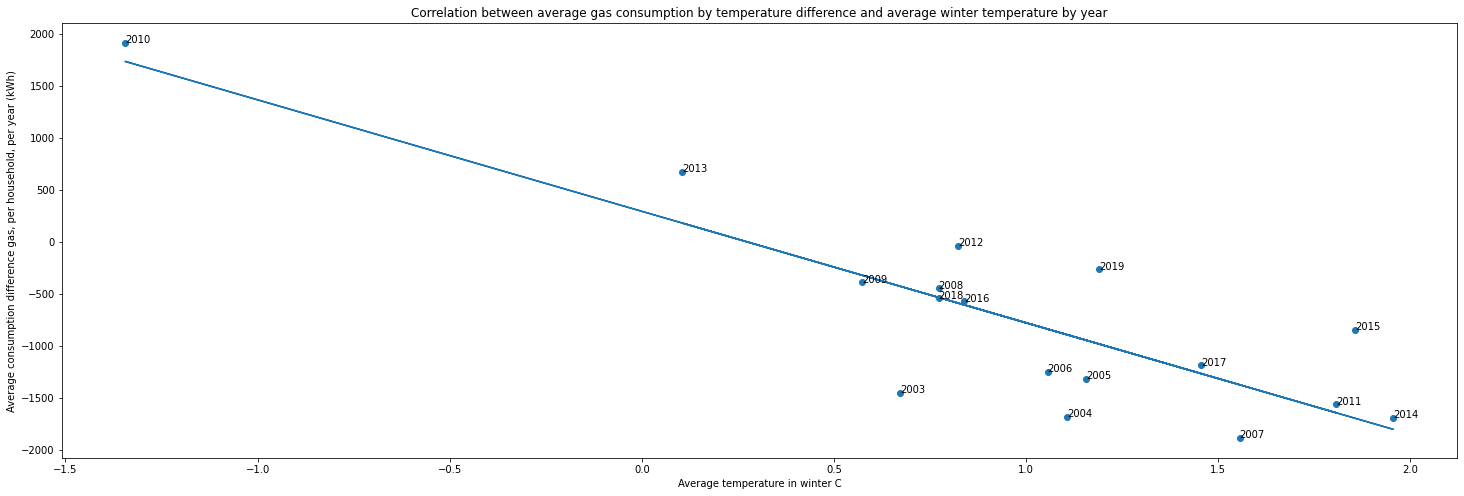

In [27]:
y = df['Average consumption difference gas (kWh)'].to_numpy()
x = tempdfanom.iloc[:, 0].to_numpy()
n = df['Year'].to_numpy()
plt.figure(figsize=(25,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Average temperature in winter C')
plt.ylabel('Average consumption difference gas, per household, per year (kWh)')
plt.title('Correlation between average gas consumption by temperature difference and average winter temperature by year')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print('Correlation Coefficient =\033[1m', my_rho[1,0], '\033[0m') 

###Combined

Correlation Coefficient = -0.8552527374747728 


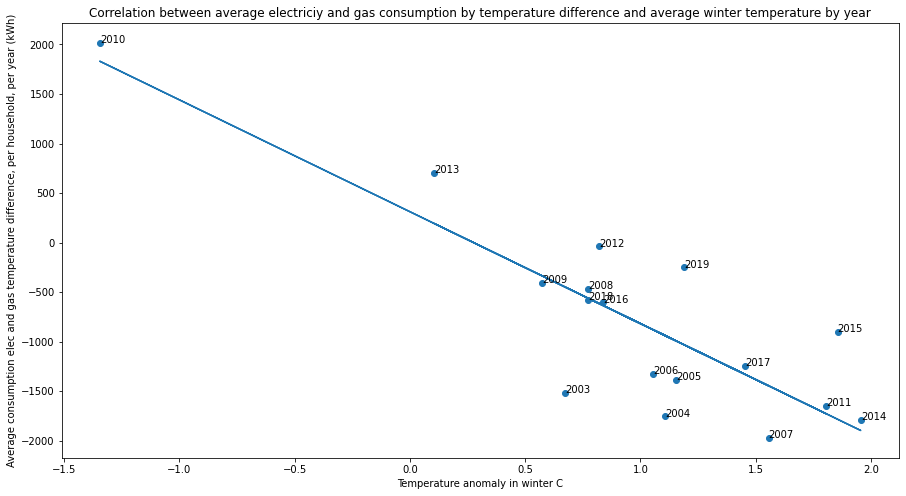

In [28]:
y = df['Average consumption difference (kWh)'].to_numpy()
x = tempdfanom.iloc[:, 0].to_numpy()

n = df['Year'].to_numpy()
plt.figure(figsize=(15,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Temperature anomaly in winter C')
plt.ylabel('Average consumption elec and gas temperature difference, per household, per year (kWh)')
plt.title('Correlation between average electriciy and gas consumption by temperature difference and average winter temperature by year')

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print('Correlation Coefficient =\033[1m', my_rho[1,0], '\033[0m') 

Estimated value of a : -1127.6107328770886
Estimated value of b : 314.05234127203346


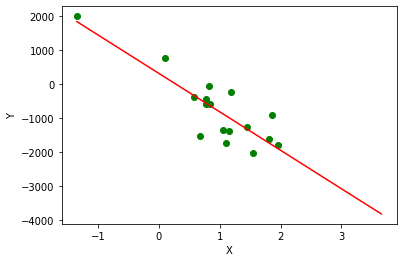

In [29]:
def function(x, a, b):
   return a*x + b

np.random.seed(6)
noise = 20*np.random.normal(size=y.size)
y = y + noise

popt,cov = sp.optimize.curve_fit(function, x, y)
a,b= popt

x_new_value = np.arange(min(x), 4, 5)
y_new_value = function(x_new_value, a, b)

plt.scatter(x,y,color="green")
plt.plot(x_new_value,y_new_value,color="red")
plt.xlabel('X')
plt.ylabel('Y')
print("Estimated value of a : "+ str(a))
print("Estimated value of b : " + str(b))
plt.show()

###GF

In [30]:
df = dfcombo[['Year','Average consumption difference elec (kWh)',	'Average consumption difference gas (kWh)',	'Average consumption difference (kWh)']]
df['temp']=combo2df['win']
y = df['Average consumption difference (kWh)'].to_numpy()
x = tempdfanom.iloc[:, 0].to_numpy()

gf = pd.DataFrame(
    {'temp': x,
     'energy': y,
    })

### Confidence Interval

In [31]:
#Credit to pylang on GitHub
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="", label = 'Confidence Interval')

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

def ConfidenceInterval(bootstrap):
  p, cov = np.polyfit(x, y, 1, cov=True)                     
  y_model = np.polyval(p, x)                                 


  n = y.size                                           
  m = p.size                                                 
  dof = n - m                                            
  t = stats.t.ppf(0.975, n - m)                              

  # Estimates of Error in Data/Model
  resid = y - y_model                                        # residuals; diff. actual data from predicted values
  chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
  chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
  s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error


  fig, ax = plt.subplots(figsize=(15, 8))
  ax.plot(
      x, y, "x", color="#b9cfe7", markersize=8, 
      markeredgewidth=1, markeredgecolor="b", markerfacecolor="None", label = 'observed'
  )


  ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Regression Line")  

  x2 = np.linspace(np.min(x), np.max(x), 100)
  y2 = np.polyval(p, x2)

  if bootstrap == True:
    plot_ci_bootstrap(x, y, resid, ax=ax)
  else:
    plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)


  pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
  ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
  ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
  ax.plot(x2, y2 + pi, "--", color="0.5")
  plt.xlabel('Temperature anomaly in winter C')
  plt.ylabel('Average consumption elec and gas temperature difference, per household, per year (kWh)')
  plt.legend()
  plt.show()

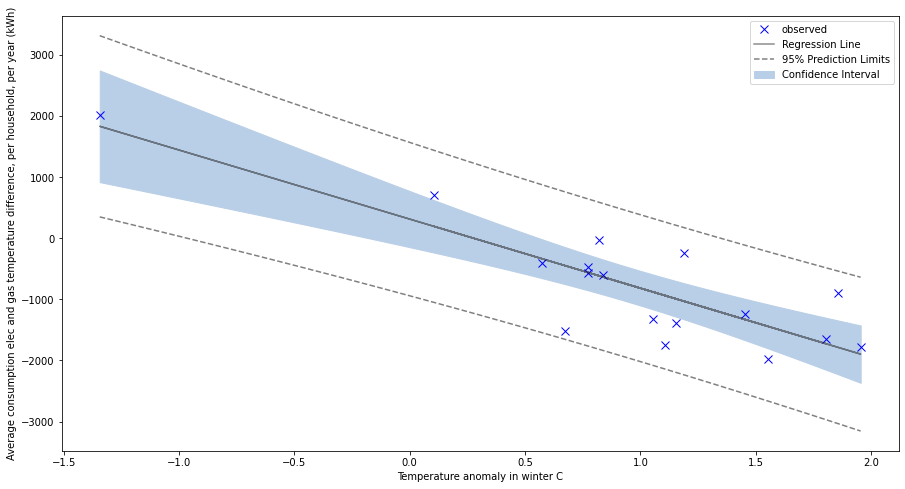

In [32]:
ConfidenceInterval(bootstrap = False)

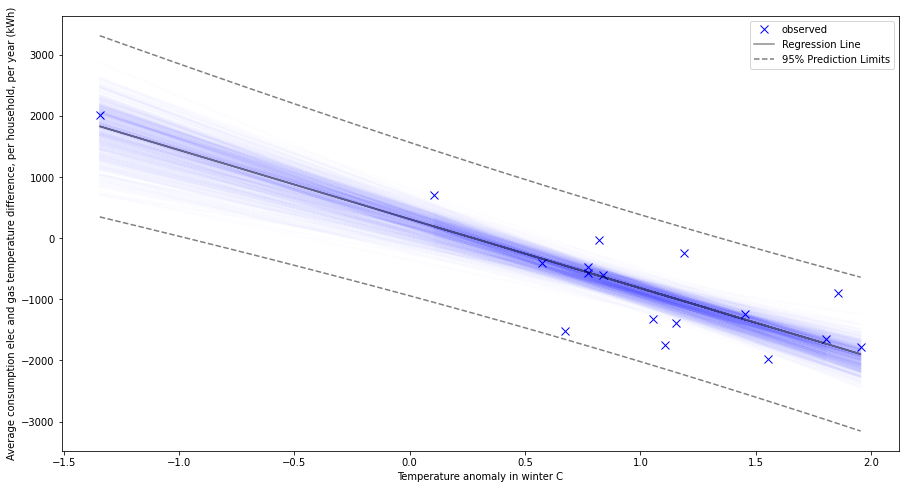

In [33]:
ConfidenceInterval(bootstrap = True)

### Calculating P-values

In [34]:


d = sm.add_constant(x)
model = sm.OLS(y, d).fit()
result = model.summary()
print(model.summary())
sum = pd.DataFrame(model.summary().tables[1])
print(0.0000121114919902182) #x1 p value higher decimal places

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     40.86
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           1.21e-05
Time:                        10:52:17   Log-Likelihood:                -130.26
No. Observations:                  17   AIC:                             264.5
Df Residuals:                      15   BIC:                             266.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.8930    215.674      1.446      0.1

### LOOCV

Standard deviation = 358.9101603854386 
Mean absolute error = 446.4466471192987 
Root mean squared absolute error = 572.8272967936888 


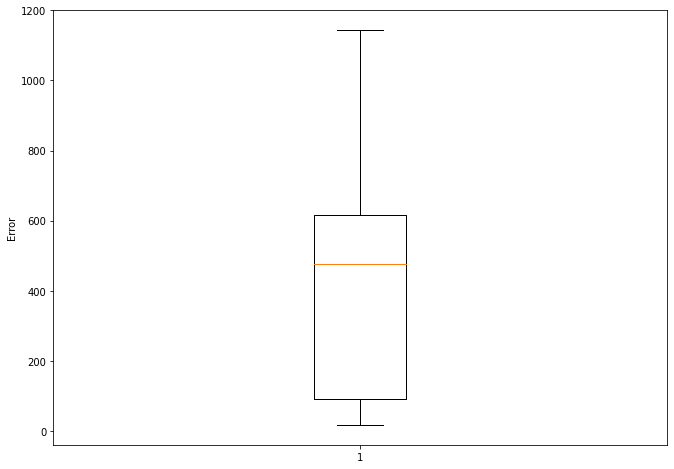

In [35]:
#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

x = x.reshape(-1, 1)

#use LOOCV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, x, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)


#view mean absolute error
print('Standard deviation =\033[1m', np.std(scores), '\033[0m')
print('Mean absolute error =\033[1m', mean(absolute(scores)), '\033[0m') 
print('Root mean squared absolute error =\033[1m', sqrt(mean(absolute(scores2))), '\033[0m') 

plt.figure(figsize=(11, 8))
plt.ylabel('Error')
plt.boxplot(absolute(scores))
plt.show()

### Testing the model

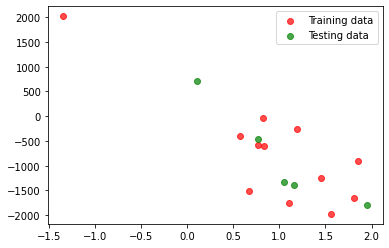

In [36]:

np.random.seed(17)

#scaler = preprocessing.MinMaxScaler()
#d = scaler.fit_transform(gf)
#scaled_df = pd.DataFrame(d)
#X = scaled_df[0]
#y = scaled_df[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

plt.scatter(X_train,y_train, label = 'Training data', color='r', alpha = .7)
plt.scatter(X_test,y_test, label = 'Testing data', color='g', alpha = .7)
plt.legend()
plt.show()

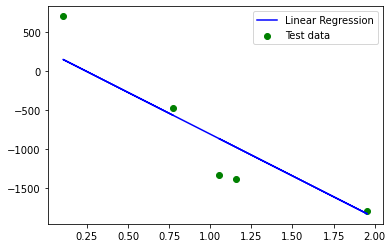

RMSE = 374.98430715244814 
R2 score = 0.8224467074430892 


In [37]:
model = LinearRegression() 
model.fit(X_train,y_train)
prediction = model.predict(X_test)

plt.plot(X_test, prediction, label='Linear Regression', color = 'b')
plt.scatter(X_test, y_test, label = 'Test data', color = 'g')
plt.legend()
plt.show()


print('RMSE =\033[1m', np.sqrt(mean_squared_error(y_test,prediction)), '\033[0m') 
print('R2 score =\033[1m', model.score(X_test, y_test), '\033[0m')  

### Ridge

In [38]:


c = np.logspace(-1,
                5,
                num = 20,
                endpoint = True,
                base = 0.1,
                dtype = None) #creating a log list for c
r2_list=[] #creating an empty list for the average accuracy score
MSE_list=[]

for i in c: #run through all the C value
  rr = Ridge(alpha=i)
  rr.fit(X_train, y_train) 
  pred_test_rr= rr.predict(X_test)
  r2_list.append(r2_score(y_test, pred_test_rr))
  MSE_list.append(np.sqrt(mean_squared_error(y_test,pred_test_rr)))

best = max(r2_list) #selecting the best accuracy
best_pos = r2_list.index(best) #finding the index to correlate to the C value
print('Best hyperparameter: \033[1m C = ', c[best_pos], '\033[0m') 
print('with R2 score: \033[1m', best, '\033[0m')
print('with RMSE : \033[1m', MSE_list[best_pos], '\033[0m')


Best hyperparameter:  C =  1.0000000000000003e-05 
with R2 score:  0.8224463049277002 
with RMSE :  374.9847321991104 


### Lasso

In [39]:
r2_list=[] #creating an empty list for the average accuracy score
MSE_list=[]

for i in c: #run through all the C value
  model_lasso = Lasso(alpha=i)
  model_lasso.fit(X_train, y_train) 
  pred_test_lasso= model_lasso.predict(X_test)
  r2_list.append(r2_score(y_test, pred_test_lasso))
  MSE_list.append(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

best = max(r2_list) #selecting the best accuracy
best_pos = r2_list.index(best) #finding the index to correlate to the C value
print('Best hyperparameter: \033[1m C = ', c[best_pos], '\033[0m') 
print('with R2 score: \033[1m', best, '\033[0m')
print('with RMSE : \033[1m', MSE_list[best_pos], '\033[0m')

Best hyperparameter:  C =  1.0000000000000003e-05 
with R2 score:  0.8224467029267079 
with RMSE :  374.984311921642 


### Random Forest

In [40]:



rfc = RandomForestRegressor(n_estimators=100, random_state=23)

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_test, y_test))
r2_score(y_test,y_pred)

0.34369953713206736


0.34369953713206736

# Historical winter temps

1.127399872852335


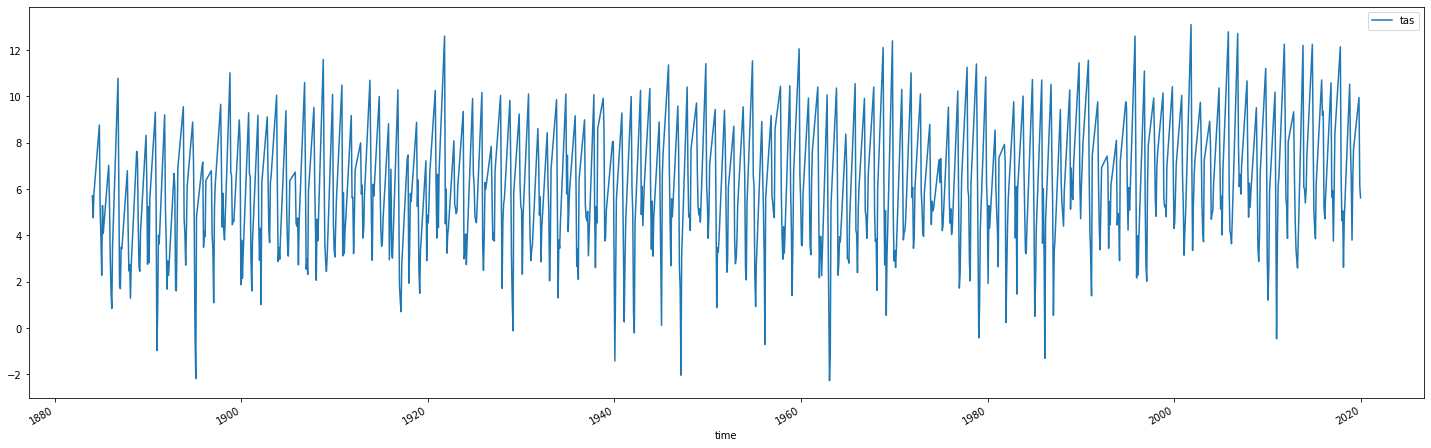

In [41]:


ds = xr.open_dataset('/content/drive/MyDrive/Dissertation/tas_hadukgrid_uk_country_mon_188401-201912.nc')
df = ds.to_dataframe()

str_df = df.select_dtypes([np.object])

str_df = str_df.stack().str.decode('utf-8').unstack()

for col in str_df:
    df[col] = str_df[col]

df = df.reset_index()
df = df[df['region']==2]
df = df[df['bnds']==0]
df = df[df.month_number.isin([1,2,3,10,11,12])]
print(df[df.calendar_year.isin(list(range(2003,2020)))].tas.mean() - df[df.calendar_year.isin(list(range(1901,1931)))].tas.mean())
df.plot(x='time', y='tas',figsize=(25,8))

# Projections

In [42]:
def rcp(path,rcp):
  ds = xr.open_dataset(path)
  df = ds.to_dataframe()
  df = df.reset_index()

  str_df = df.select_dtypes([np.object])
  str_df = str_df[['geo_region','season']]
  str_df = str_df.stack().str.decode('utf-8').unstack()
  for col in str_df:
    df[col] = str_df[col]

  df=df[df['percentile']==50.00]
  df=df[df['bnds']==0]
  df=df[df['region']==2]
  df = df[df.month_number.isin([1,2,3,10,11,12])]
  df['rcp'] = rcp
  return(df)

## Temperature projections

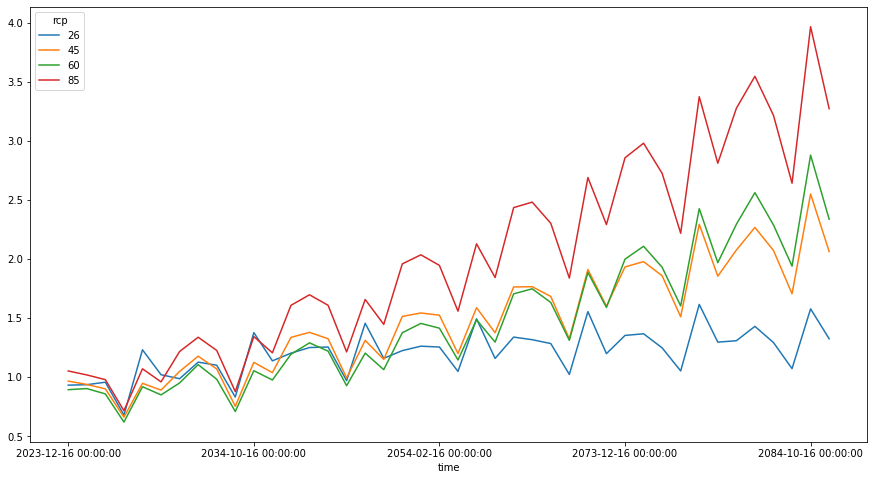

In [43]:
df85 = rcp('/content/drive/MyDrive/Dissertation/tasAnom_rcp85_land-prob_uk_country_cdf_b6190_30y_mon_20091201-20991130.nc',85)
df60 = rcp('/content/drive/MyDrive/Dissertation/tasAnom_rcp60_land-prob_uk_country_cdf_b6190_30y_mon_20091201-20991130.nc',60)
df45 = rcp('/content/drive/MyDrive/Dissertation/tasAnom_rcp45_land-prob_uk_country_cdf_b6190_30y_mon_20091201-20991130.nc',45)
df26 = rcp('/content/drive/MyDrive/Dissertation/tasAnom_rcp26_land-prob_uk_country_cdf_b6190_30y_mon_20091201-20991130.nc',26)

frames = [df85[['time','tasAnom','rcp']], df60[['time','tasAnom','rcp']], df45[['time','tasAnom','rcp']], df26[['time','tasAnom','rcp']]]
df = pd.concat(frames)

df = df.pivot(index='time', columns='rcp', values='tasAnom')
df.plot(figsize=(15, 8))

In [44]:
 def combine(fd,rcpp):
  df = fd[['time','tasAnom','month_number','season_year','rcp']]
  df = df.pivot(index='month_number', columns='season_year', values='tasAnom')
  dfx = pd.DataFrame
  dfx = df.mean(axis=0)
  dfx = dfx.reset_index()
  dfx.columns.values[0:2] =["year", "winmean" ]
  dfx['rcp'] = rcpp
  return(dfx)

In [45]:
dff85 = combine(df85,85)
dff60 = combine(df60,60)
dff45 = combine(df45,45)
dff26 = combine(df26,26)

frames = [dff85,dff60,dff45,dff26]

df = pd.concat(frames)

## RCP 85 Energy consumption prediction

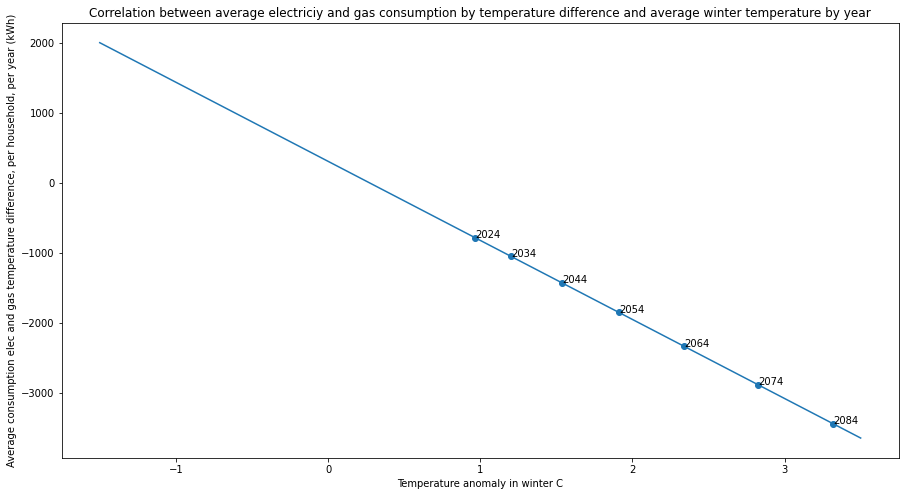

In [46]:
tempdfanom['year'] = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
tempdfanom
dfy = pd.concat([tempdfanom,dff85])
dfy.reset_index()

plt.figure(figsize=(15,8))

plt.xlabel('Temperature anomaly in winter C')
plt.ylabel('Average consumption elec and gas temperature difference, per household, per year (kWh)')

plt.title('Correlation between average electriciy and gas consumption by temperature difference and average winter temperature by year')


x1 = np.linspace(-1.5,3.5,2)
y1 = -1129.57*x1 + 311.893
x2 = dff85['winmean'] 
y2 = -1129.57*x2 + 311.893
plt.plot(x1, y1)
plt.scatter(x2, y2)
n = dff85['year'].to_numpy()
for i, txt in enumerate(n):
    plt.annotate(txt, (x2[i], y2[i]))

## All RCP scenarios prediction

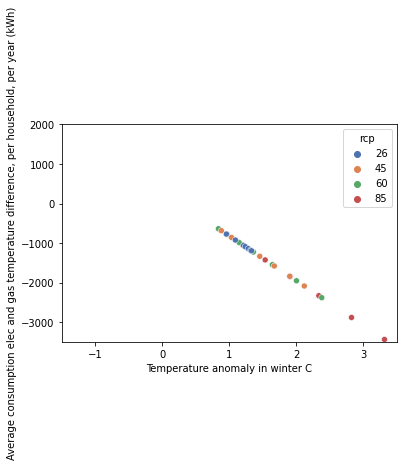

In [47]:
import seaborn as sns
x = df['winmean'].to_numpy()
y = -1129.57*x + 311.893

ax = sns.scatterplot(x=x, y=y, data=df, hue="rcp", palette = 'deep')

sns.set(rc={'figure.figsize':(15,8)})


ax.set(xlabel='Temperature anomaly in winter C', ylabel='Average consumption elec and gas temperature difference, per household, per year (kWh)')
ax.set(xlim=(-1.5, 3.5))
ax.set(ylim=(-3500, 2000))
plt.show()

In [48]:
df['consumption change'] = y

In [49]:
df = df[['rcp','consumption change','year']]
dff = df.pivot(index='rcp', columns='year', values='consumption change')
dff.T

rcp,26,45,60,85
year,,,,
2024,-772.132874,-687.097168,-637.955933,-779.624695
2034,-923.554626,-857.768860,-776.309753,-1045.387451
2044,-1061.642090,-1099.455078,-987.183777,-1426.283936
2054,-1089.478760,-1334.857666,-1227.056396,-1847.978027
2064,-1141.282715,-1580.144043,-1547.293701,-2331.624268
2074,-1181.924316,-1840.207520,-1954.178223,-2882.545898
2084,-1195.679199,-2086.258057,-2380.937744,-3438.820312


In [50]:
df['cost change'] = df['consumption change']*0.07633784 #cost of 1KWH
dff = df[['rcp','year','cost change']]
dff = dff.pivot(index='rcp', columns='year', values='cost change')

dff.T

rcp,26,45,60,85
year,,,,
2024,-58.942955,-52.451511,-48.700176,-59.514862
2034,-70.502159,-65.480217,-59.261806,-79.802620
2044,-81.043457,-83.930023,-75.359474,-108.879433
2054,-83.168449,-101.900146,-93.670830,-141.070648
2064,-87.123055,-120.624779,-118.117050,-177.991150
2074,-90.225548,-140.477463,-149.177734,-220.047318
2084,-91.275566,-159.260422,-181.755630,-262.512115


In [51]:
#THE AVERAGE FUEL POVERTY GAP FROM 2003 - 2019 WAS £344
df['cost change'] = df['cost change'] + 344
dff = df[['rcp','year','cost change']]
dff = dff.pivot(index='rcp', columns='year', values='cost change')

dff.T

rcp,26,45,60,85
year,,,,
2024,285.057037,291.548492,295.299835,284.485138
2034,273.497833,278.519775,284.738190,264.197388
2044,262.956543,260.069977,268.640533,235.120575
2054,260.831543,242.099854,250.329163,202.929352
2064,256.876953,223.375214,225.882950,166.008850
2074,253.774445,203.522537,194.822266,123.952682
2084,252.724426,184.739578,162.244370,81.487885


Text(0, 0.5, 'Average Household Fuel Poverty Gap (£)')

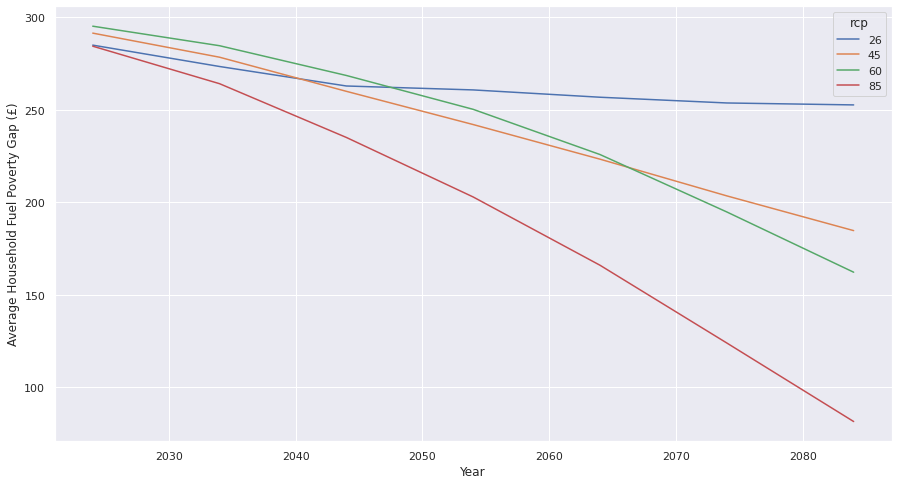

In [52]:
dff.T.plot(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Average Household Fuel Poverty Gap (£)')


,Month Year,monthly percent
0,January 2003,0.100496
1,February 2003,0.094642
2,March 2003,0.102691
3,April 2003,0.075779
4,May 2003,0.066509
...,...,...
211,August 2020,0.065425
212,September 2020,0.069178
213,October 2020,0.087405
214,November 2020,0.095429


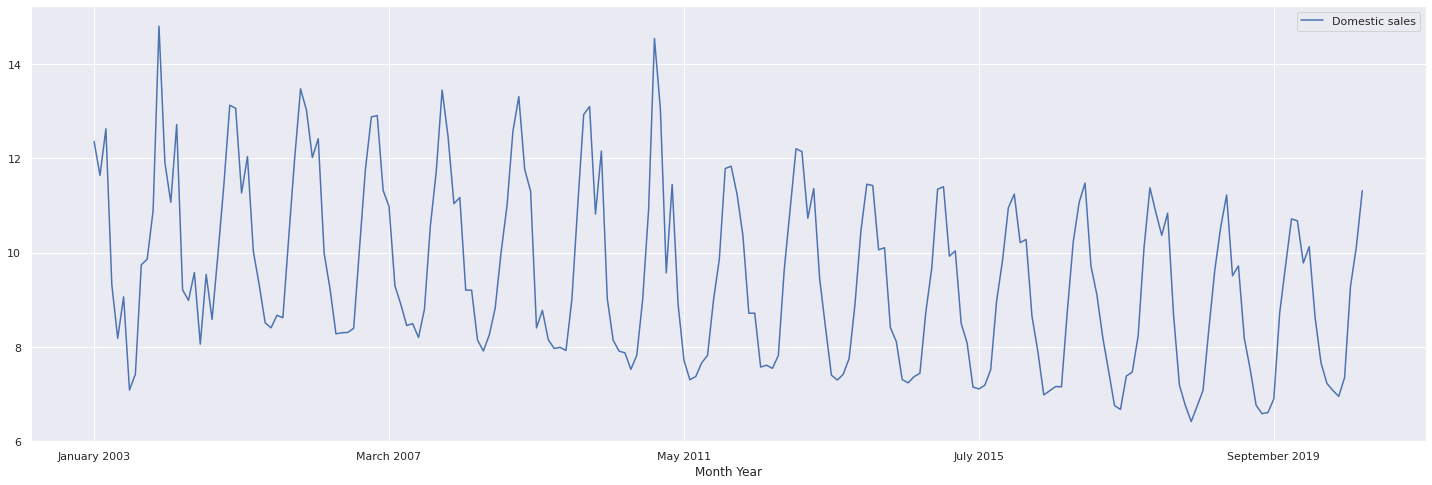

In [53]:
file_id = '1Yc5fc_cz9OPFRui80TBFpiXqJvKLVKJA'
downloaded = drive.CreateFile({'id': file_id})


downloaded.GetContentFile('monthly.xlsx')


monthlydf = pd.read_excel('monthly.xlsx')
monthlydf = monthlydf[monthlydf.Year.isin(list(range(2003,2021)))]
monthlydf.plot(x='Month Year', y='Domestic sales',figsize=(25,8))
monthlydf[['Month Year','monthly percent']]

Text(0, 0.5, 'Change in consumption due to temperate (kWh')

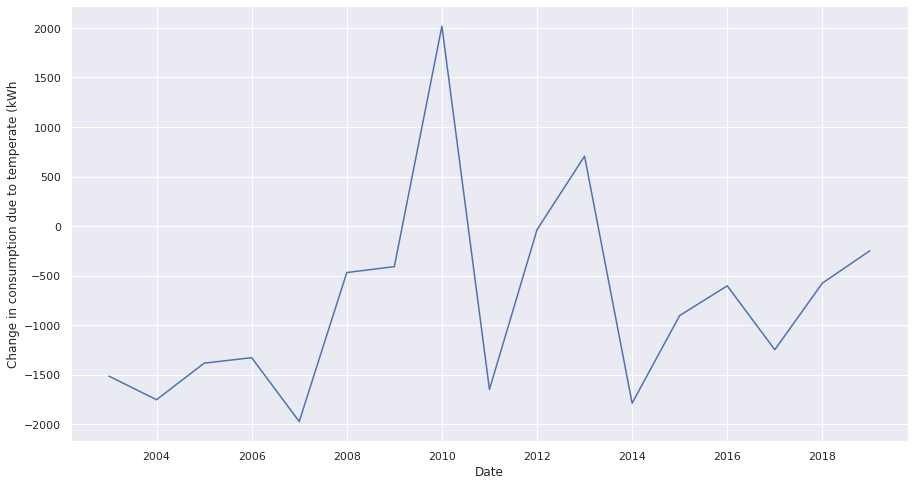

In [54]:
dfcombo[['Year','Average consumption difference (kWh)']]
dfcombo.plot(x='Year', y='Average consumption difference (kWh)',legend=None)
plt.xlabel('Date')
plt.ylabel('Change in consumption due to temperate (kWh')

In [55]:
combo3df=pd.DataFrame()
combo3df['year'] = list(range(2003,2020))
combo3df['actual'] = elecdf['Average consumption (actual) (kWh)'] + gasdf['Average consumption (actual) (kWh)']
combo3df['adjusted'] = elecdf['Average consumption (temperature adjusted) (kWh)'] + gasdf['Average consumption (temp adjusted) (kWh)']
combo3df

,year,actual,adjusted
0,2003,22350,23865
1,2004,22717,24470
2,2005,21902,23286
3,2006,21282,22610
4,2007,20481,22454
5,2008,20778,21247
6,2009,19963,20372
7,2010,21869,19851
8,2011,17878,19527
9,2012,19518,19555


Text(0, 0.5, 'Change in consumption due to temperate (kWh')

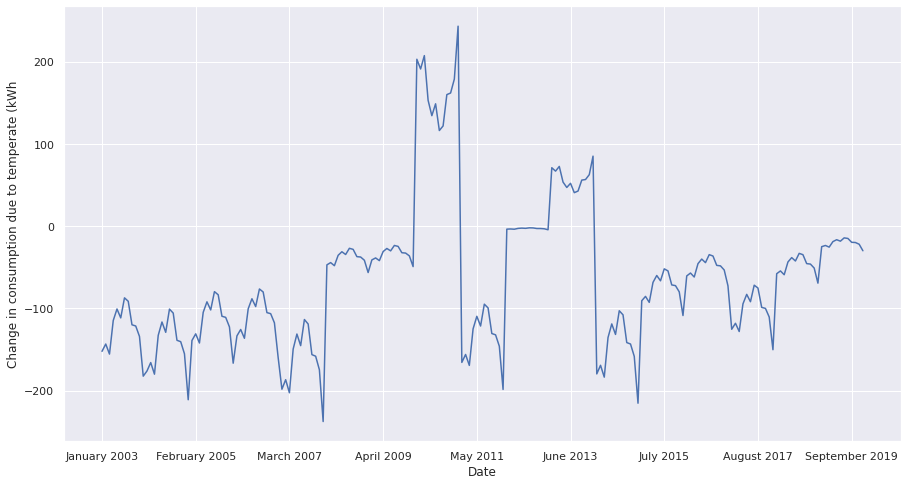

In [56]:
actual = []
adjusted = []
month = []
year = []
for i in range(17):
  for j in range(12):
    actual.append(combo3df.at[i, 'actual']*monthlydf.at[j,'monthly percent'])
    year.append(i)
    month.append(j)

for i in range(17):
  for j in range(12):
    adjusted.append(combo3df.at[i, 'adjusted']*monthlydf.at[j,'monthly percent'])

year = map(lambda x:x+2003, year)
month = map(lambda x:x+1, month)

df = pd.DataFrame(list(zip(month, year, actual, adjusted)),columns =['month', 'year', 'actual', 'adjusted'])
df['difference'] = df['actual'] - df['adjusted']
df['month year'] = monthlydf['Month Year']
df['difference'] = df['difference']
df.plot(x = 'month year', y='difference' , legend=None)
plt.xlabel('Date')
plt.ylabel('Change in consumption due to temperate (kWh')


[[ 1.         -0.18568321]
 [-0.18568321  1.        ]]


Text(0.5, 1.0, 'Correlation between average electriciy and gas consumption by temperature difference and average winter temperature by year')

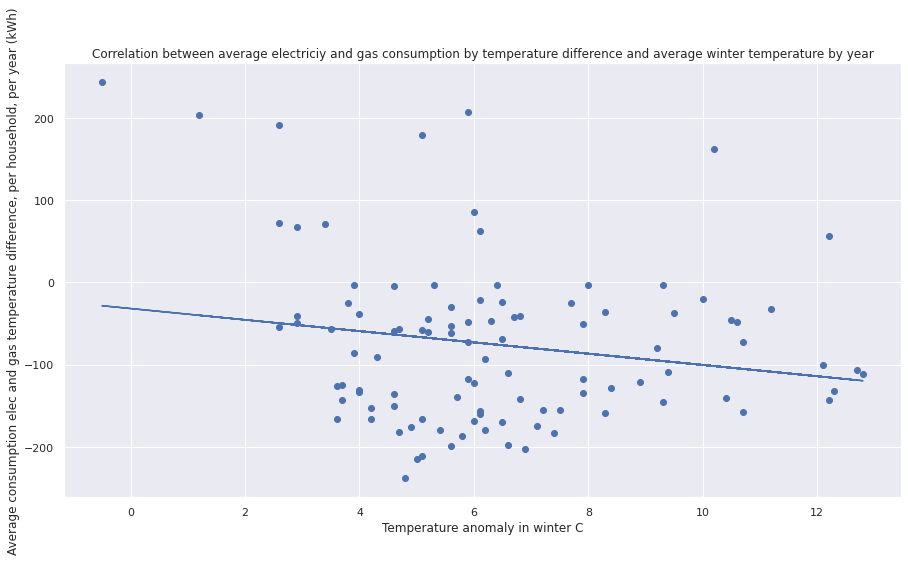

In [57]:
file_id = '1delBnwaEqE96A6zaNSy7iCBvddJDzQlR'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('monthlytemp.xlsx')


monthlytempdf = pd.read_excel('monthlytemp.xlsx')
monthlytempdf['difference'] = df['difference']
monthlytempdf['month'] = monthlydf['Month']
monthlytempdf = monthlytempdf[monthlytempdf.month.isin([1,2,3,10,11,12])]

y = monthlytempdf['difference'].to_numpy()
x = monthlytempdf['Temp'].to_numpy()

#n = df['Year'].to_numpy()
plt.figure(figsize=(15,8))
plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.xlabel('Temperature anomaly in winter C')
plt.ylabel('Average consumption elec and gas temperature difference, per household, per year (kWh)')
#for i, txt in enumerate(n):
    #plt.annotate(txt, (x[i], y[i]))

my_rho = np.corrcoef(x, y)

print(my_rho)
plt.title('Correlation between average electriciy and gas consumption by temperature difference and average winter temperature by year')

In [58]:
dfc = dfcombo[['Average consumption difference (kWh)']]
dfc['dates'] = pd.date_range(start='1/1/2003', end='1/1/2019', freq='AS')
dfc

,Average consumption difference (kWh),dates
0,-1515,2003-01-01
1,-1753,2004-01-01
2,-1384,2005-01-01
3,-1328,2006-01-01
4,-1973,2007-01-01
5,-469,2008-01-01
6,-409,2009-01-01
7,2018,2010-01-01
8,-1649,2011-01-01
9,-37,2012-01-01
